In [25]:
import json
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [2]:
sec = yf.Ticker("^FTSE")
data = sec.history()
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-31 00:00:00+00:00,7047.700195,7132.899902,7030.100098,7094.500000,881761300,0,0
2022-11-01 00:00:00+00:00,7094.500000,7221.299805,7094.500000,7186.200195,879817800,0,0
2022-11-02 00:00:00+00:00,7186.200195,7205.100098,7130.500000,7144.100098,688038000,0,0
2022-11-03 00:00:00+00:00,7144.100098,7188.600098,7076.500000,7188.600098,721711200,0,0
2022-11-04 00:00:00+00:00,7188.600098,7376.200195,7188.600098,7334.799805,960620800,0,0


In [3]:
my_max = data['Close'].idxmax()
my_min = data['Close'].idxmin()

In [4]:
print(my_max, " , ", my_min)

2022-11-30 00:00:00+00:00  ,  2022-10-31 00:00:00+00:00


In [5]:
print('Info')
print(json.dumps(sec.info, indent=4, sort_keys=True))

Info
{
    "algorithm": null,
    "ask": 0,
    "askSize": 0,
    "averageDailyVolume10Day": 679501150,
    "averageVolume": 894133659,
    "averageVolume10days": 679501150,
    "beta": null,
    "bid": 0,
    "bidSize": 0,
    "circulatingSupply": null,
    "coinMarketCapLink": null,
    "currency": "GBP",
    "dayHigh": 7599.27,
    "dayLow": 7512,
    "dividendRate": null,
    "dividendYield": null,
    "exDividendDate": null,
    "exchange": "FGI",
    "exchangeTimezoneName": "Europe/London",
    "exchangeTimezoneShortName": "GMT",
    "expireDate": null,
    "fiftyDayAverage": 7142.692,
    "fiftyTwoWeekHigh": 7687.3,
    "fiftyTwoWeekLow": 6707.6,
    "fiveYearAvgDividendYield": null,
    "forwardPE": null,
    "fromCurrency": null,
    "gmtOffSetMilliseconds": "0",
    "isEsgPopulated": false,
    "lastMarket": null,
    "logo_url": "",
    "market": "gb_market",
    "marketCap": null,
    "maxAge": 1,
    "maxSupply": null,
    "messageBoardId": "finmb_INDEXFTSE",
    "navPrice

In [6]:
start = pd.to_datetime('2007-07-07')

In [7]:
stock = ['AMZN']

In [8]:
data = yf.download(stock, start=start, end=datetime.date.today())

[*********************100%***********************]  1 of 1 completed


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3878 entries, 2007-07-09 00:00:00-04:00 to 2022-11-29 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3878 non-null   float64
 1   High       3878 non-null   float64
 2   Low        3878 non-null   float64
 3   Close      3878 non-null   float64
 4   Adj Close  3878 non-null   float64
 5   Volume     3878 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 212.1 KB


In [10]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-07-09 00:00:00-04:00,3.469000,3.617500,3.451000,3.603500,3.603500,296338000
2007-07-10 00:00:00-04:00,3.582500,3.597000,3.503500,3.514000,3.514000,177708000
2007-07-11 00:00:00-04:00,3.529000,3.582500,3.507500,3.536500,3.536500,131872000
2007-07-12 00:00:00-04:00,3.565500,3.678500,3.536500,3.639500,3.639500,229032000
2007-07-13 00:00:00-04:00,3.654000,3.767500,3.648500,3.755000,3.755000,250040000
...,...,...,...,...,...,...
2022-11-22 00:00:00-05:00,92.620003,93.349998,90.870003,93.199997,93.199997,62192000
2022-11-23 00:00:00-05:00,93.239998,94.580002,92.830002,94.129997,94.129997,59414700
2022-11-25 00:00:00-05:00,93.790001,94.430000,93.070000,93.410004,93.410004,35088600


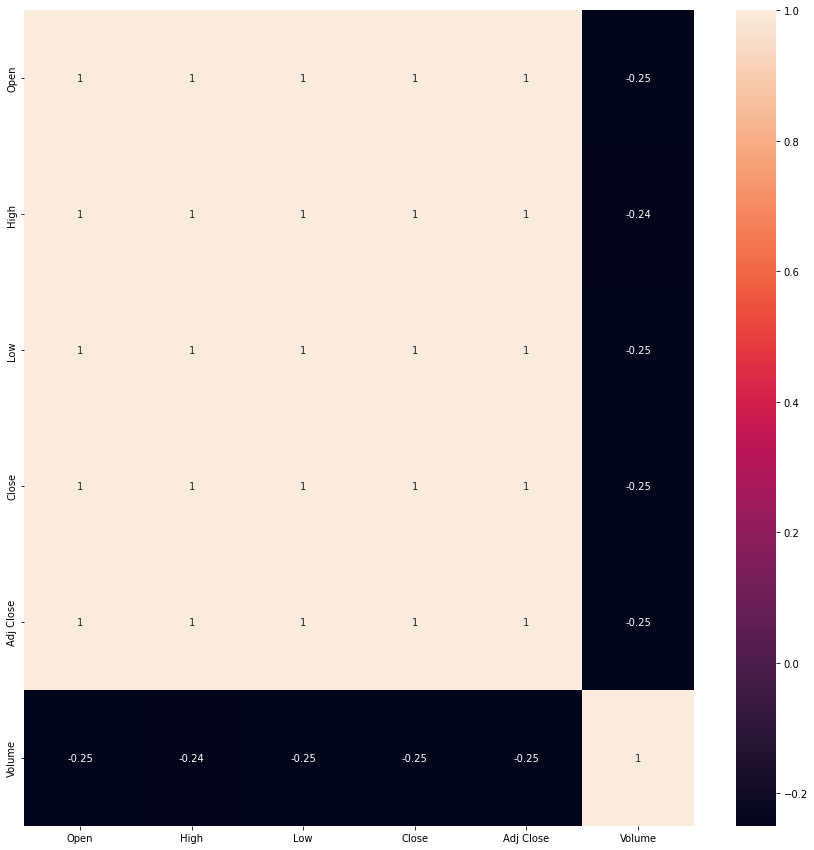

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), cbar=True, annot=True)

plt.show()

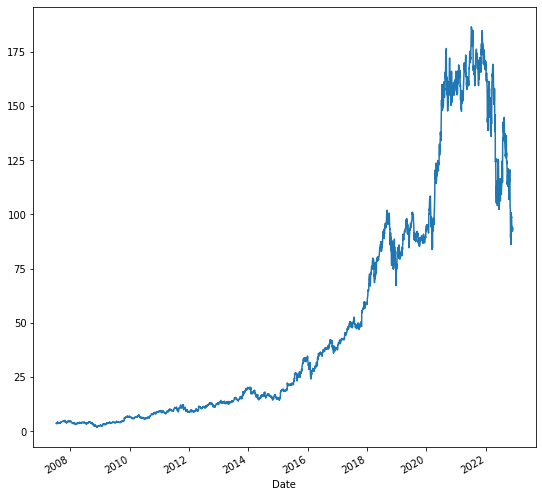

In [12]:
plt.figure(figsize=(9, 9))

data['Adj Close'].plot()
plt.show()

In [13]:
min_max = preprocessing.MinMaxScaler()
data_scaled = pd.DataFrame(min_max.fit_transform(data), columns=data.columns)

In [14]:
data_scaled['Date'] = data.index

In [15]:
data_scaled

,Open,High,Low,Close,Adj Close,Volume,Date
0,0.009192,0.008931,0.009377,0.010021,0.010021,0.233932,2007-07-09 00:00:00-04:00
1,0.009804,0.008821,0.009664,0.009536,0.009536,0.134362,2007-07-10 00:00:00-04:00
2,0.009515,0.008744,0.009686,0.009658,0.009658,0.095890,2007-07-11 00:00:00-04:00
3,0.009712,0.009258,0.009844,0.010215,0.010215,0.177440,2007-07-12 00:00:00-04:00
4,0.010190,0.009735,0.010456,0.010840,0.010840,0.195073,2007-07-13 00:00:00-04:00
...,...,...,...,...,...,...,...
3873,0.489957,0.489545,0.486801,0.494800,0.494800,0.037406,2022-11-22 00:00:00-05:00
3874,0.493301,0.496133,0.497506,0.499832,0.499832,0.035075,2022-11-23 00:00:00-05:00
3875,0.496267,0.495329,0.498816,0.495937,0.495937,0.014657,2022-11-25 00:00:00-05:00
3876,0.497022,0.505881,0.500782,0.498858,0.498858,0.048108,2022-11-28 00:00:00-05:00


In [16]:
train_num = int(data_scaled.shape[0] * 0.7)
test_num = data_scaled.shape[0] - train_num
print("train_num = ", train_num, ", test_num = ", test_num)

train_num =  2714 , test_num =  1164


In [17]:
data_train = data_scaled[:train_num]
data_test = data_scaled[train_num:]

In [18]:
np_data_train = np.array(data_train[['Date','Close']])

In [19]:
def get_train(data_train, time_steps = 3):
    copy_data_train = np.array(data_train[['Close', 'Date']])
    x_train = []
    y_train = []
    for i in range(time_steps, copy_data_train.shape[0]):
        x_train.append(copy_data_train[i - time_steps:i])
        y_train.append(copy_data_train[i, 0])
    return x_train, y_train

In [20]:
x_train, y_train = get_train(data_train)

In [26]:
def long_short_term_memory_model(alpha=0.2):
    model = tf.keras.Sequential()
    model.add(layers.Conv1D(filters=32, activation='relu', strides=1, padding='causal',
                                     input_shape=[None, 1])) #shape 2 хз
    model.add(layers.Dropout(alpha))
    model.add(layers.LSTM(64, return_sequences=True))
    model.add(layers.Dropout(alpha))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(1))

    return model